In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [2]:
#import google libraries
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
 #reading the dataset
dataset= pd.read_csv('/content/drive/My Drive/V2 Backup/Deep Learning/Identifying genre of Movie/Multi_Label_dataset/train.csv')

In [4]:
# printing first five rows of the file
dataset.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
dataset.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [6]:
train_image = []

for i in tqdm(range(dataset.shape[0])):
    img = image.load_img('/content/drive/My Drive/V2 Backup/Deep Learning/Identifying genre of Movie/Multi_Label_dataset/Images/'+dataset['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  6%|▌         | 450/7254 [02:10<33:40,  3.37it/s]

KeyboardInterrupt: ignored

In [20]:
l = list(tqdm(range(dataset.shape[0])))[0:100]
train_image = []
for i in range(100):
    img = image.load_img('/content/drive/My Drive/V2 Backup/Deep Learning/Identifying genre of Movie/Multi_Label_dataset/Images/'+dataset['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)


100%|██████████| 7254/7254 [00:00<00:00, 1723042.32it/s]

In [21]:
X.shape

(100, 400, 400, 3)

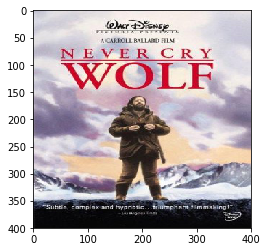

In [22]:
plt.imshow(X[20])

In [23]:
dataset['Genre'][20]

"['Adventure', 'Drama']"

In [24]:
y = np.array(dataset.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [29]:
y=(100, 25)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

ValueError: ignored